# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
import os
# Import API key
from api_keys import api_key
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


In [3]:
# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
df_cities = pd.DataFrame(cities,columns=['City'])
df_cities=df_cities.sample(n=500)
Base_Url='http://api.openweathermap.org/data/2.5/weather'
Row_Count =0
p={
    'APPID':api_key,
    'units':'imperial'
}
row_count =0
load_count=0
df_cities['Cloudiness']=''
df_cities['Country']=''
df_cities['Date']=''
df_cities['Humidity']=''
df_cities['Lat']=''
df_cities['Long']=''
df_cities['Max Temp']=''
df_cities['Windspeed']=''

print('Beginning Data Retrieval')
print('-----------------------------')

for index, row in df_cities.iterrows():
    p['q']=row['City']
    print(f'Processing Record {row_count} for batch {load_count} | {row.City} ')
    row_count+=1
    
    City_Data=requests.get(Base_Url,p)
    City_Data=City_Data.json()
    
    try:
        df_cities.loc[index,'Cloudiness']=City_Data['clouds']['all']
        df_cities.loc[index,'Country'] = City_Data['sys']['country']
        df_cities.loc[index,'Date']=datetime.fromtimestamp(City_Data['dt'])
        df_cities.loc[index,'Humidity']=City_Data['main']['humidity']
        df_cities.loc[index,'Lat']=City_Data['coord']['lat']
        df_cities.loc[index,'Long']=City_Data['coord']['lon']
        df_cities.loc[index,'Max Temp']=City_Data['main']['temp_max']
        df_cities.loc[index,'Windspeed']=City_Data['wind']['speed']
        
    except:
        print(f"Error with city data. Skipping {row.City} ......")
        df_cities.drop(labels=index, inplace=True)
    
    time.sleep(1) #60 seconds / limit request of 60
    if row_count==60:
        load_count+=1
        time.sleep(5) # random number 
 
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')


Beginning Data Reetrieval
-----------------------------
Processing Record 0 for batch 0 | khatanga 
Processing Record 1 for batch 0 | buluang 
Processing Record 2 for batch 0 | ciudad bolivar 
Processing Record 3 for batch 0 | port blair 
Processing Record 4 for batch 0 | jieshi 
Processing Record 5 for batch 0 | ugoofaaru 
Processing Record 6 for batch 0 | charters towers 
Processing Record 7 for batch 0 | mrirt 
Error with city data. Skipping mrirt ......
Processing Record 8 for batch 0 | upernavik 
Processing Record 9 for batch 0 | myitkyina 
Processing Record 10 for batch 0 | shenjiamen 
Processing Record 11 for batch 0 | galbshtadt 
Processing Record 12 for batch 0 | devils lake 
Processing Record 13 for batch 0 | colares 
Processing Record 14 for batch 0 | ampanihy 
Processing Record 15 for batch 0 | karasburg 
Processing Record 16 for batch 0 | minab 
Processing Record 17 for batch 0 | grindavik 
Processing Record 18 for batch 0 | baykit 
Processing Record 19 for batch 0 | nyurb

Processing Record 165 for batch 1 | bluefields 
Processing Record 166 for batch 1 | yulara 
Processing Record 167 for batch 1 | kidal 
Processing Record 168 for batch 1 | scottsburgh 
Error with city data. Skipping scottsburgh ......
Processing Record 169 for batch 1 | jubayl 
Error with city data. Skipping jubayl ......
Processing Record 170 for batch 1 | coihaique 
Processing Record 171 for batch 1 | dutlwe 
Processing Record 172 for batch 1 | chumikan 
Processing Record 173 for batch 1 | coquimbo 
Processing Record 174 for batch 1 | zverinogolovskoye 
Processing Record 175 for batch 1 | jiaohe 
Processing Record 176 for batch 1 | coahuayana 
Processing Record 177 for batch 1 | portland 
Processing Record 178 for batch 1 | vieques 
Processing Record 179 for batch 1 | saldanha 
Processing Record 180 for batch 1 | udachnyy 
Processing Record 181 for batch 1 | buchanan 
Processing Record 182 for batch 1 | margate 
Processing Record 183 for batch 1 | yar-sale 
Processing Record 184 for b

Processing Record 326 for batch 1 | butaritari 
Processing Record 327 for batch 1 | fort saint john 
Error with city data. Skipping fort saint john ......
Processing Record 328 for batch 1 | ust-kamchatsk 
Error with city data. Skipping ust-kamchatsk ......
Processing Record 329 for batch 1 | klaksvik 
Processing Record 330 for batch 1 | mount gambier 
Processing Record 331 for batch 1 | pincher creek 
Processing Record 332 for batch 1 | khor 
Processing Record 333 for batch 1 | tiksi 
Processing Record 334 for batch 1 | namibe 
Processing Record 335 for batch 1 | grand river south east 
Error with city data. Skipping grand river south east ......
Processing Record 336 for batch 1 | acapulco 
Processing Record 337 for batch 1 | aden 
Processing Record 338 for batch 1 | port alfred 
Processing Record 339 for batch 1 | berdigestyakh 
Processing Record 340 for batch 1 | taolanaro 
Error with city data. Skipping taolanaro ......
Processing Record 341 for batch 1 | sentyabrskiy 
Error with 

Processing Record 486 for batch 1 | amderma 
Error with city data. Skipping amderma ......
Processing Record 487 for batch 1 | touros 
Processing Record 488 for batch 1 | san patricio 
Processing Record 489 for batch 1 | saint albans 
Processing Record 490 for batch 1 | marienburg 
Processing Record 491 for batch 1 | ostrowiec swietokrzyski 
Processing Record 492 for batch 1 | celestun 
Processing Record 493 for batch 1 | sechura 
Processing Record 494 for batch 1 | macaboboni 
Error with city data. Skipping macaboboni ......
Processing Record 495 for batch 1 | nguiu 
Error with city data. Skipping nguiu ......
Processing Record 496 for batch 1 | guozhen 
Processing Record 497 for batch 1 | nouadhibou 
Processing Record 498 for batch 1 | komsomolskiy 
Processing Record 499 for batch 1 | port-cartier 
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
pathcheck=os.path.join('output_data')
if not os.path.exists(pathcheck):
    os.makedirs(pathcheck)

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Export the city data into a .csv.
df_cities.to_csv(output_data_file, index=False)

In [7]:
#display dataframe
df_cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Windspeed
180,khatanga,20,RU,2019-08-24 21:53:54,70,71.98,102.47,59.45,7.45
433,buluang,75,PH,2019-08-24 21:53:55,62,10.47,123.98,87.8,5.82
339,ciudad bolivar,0,VE,2019-08-24 21:53:57,86,8.12,-63.55,76.62,4.76
455,port blair,100,IN,2019-08-24 21:53:58,81,11.67,92.75,81.75,25.41
7,jieshi,100,CN,2019-08-24 21:53:59,85,22.82,115.83,84,1.99


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

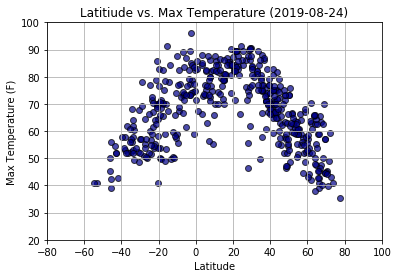

In [8]:
plt.scatter(x=df_cities['Lat'],y=df_cities['Max Temp'], c='darkblue', edgecolor='black',alpha=.7)
plt.grid(True)
plt.title(label=f'Latitiude vs. Max Temperature ({str(date.today())})')
plt.ylabel('Max Temperature (F)')
plt.xlim(-80,100)
plt.ylim(20,100)
plt.xlabel('Latitude')
plt.savefig('LatvsMaxTemp.png')

#### Latitude vs. Humidity Plot

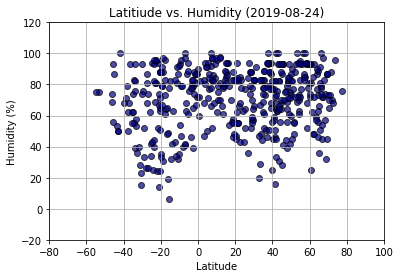

In [10]:
plt.scatter(x=df_cities['Lat'],y=df_cities['Humidity'], c='darkblue', edgecolor='black',alpha=.7)
plt.grid(True)
plt.title(label=f'Latitiude vs. Humidity ({str(date.today())})')
plt.ylabel('Humidity (%)')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.xlabel('Latitude')
plt.savefig('LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

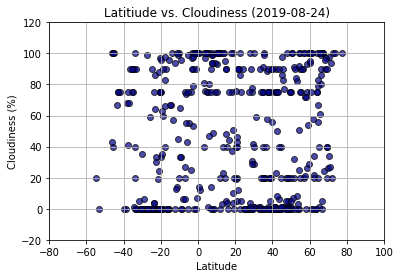

In [11]:
plt.scatter(x=df_cities['Lat'],y=df_cities['Cloudiness'], c='darkblue', edgecolor='black',alpha=.7)
plt.grid(True)
plt.title(label=f'Latitiude vs. Cloudiness ({str(date.today())})')
plt.ylabel('Cloudiness (%)')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.xlabel('Latitude')
plt.savefig('LatvsCloud.png')

#### Latitude vs. Wind Speed Plot

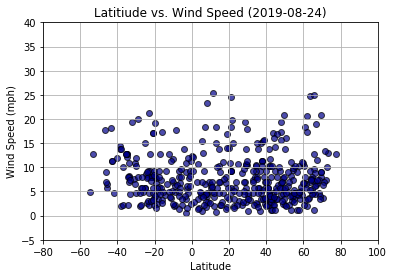

In [12]:
plt.scatter(x=df_cities['Lat'],y=df_cities['Windspeed'], c='darkblue', edgecolor='black',alpha=.7)
plt.grid(True)
plt.title(label=f'Latitiude vs. Wind Speed ({str(date.today())})')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.xlabel('Latitude')
plt.savefig('LatvsWind.png')

# Observations

1.	The temperature dropped off the farther you get away from 0 degrees (equator) and warmer as you came close to it.
2.	The windiness shows that that we no data from -60 to 80 latitudes but over all seems to remain rather calm around the 0-10 mph band
3.	Cloudiness doesn’t seem to really to be affected by latitude. 
